In [236]:
!nvidia-smi

Sat Feb 18 13:06:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    26W /  70W |   2042MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [237]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [239]:
import torch
import torchvision
from torchvision.models import efficientnet_b2, EfficientNet_B2_Weights
import os
import json

In [238]:
import torch.nn as nn


In [240]:
model = efficientnet_b2(weights=EfficientNet_B2_Weights.DEFAULT, progress=True)
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [241]:
for param in model.parameters():
    param.requires_grad = False

In [242]:
model.classifier =nn.Sequential(
                          nn.Dropout(p=0.3, inplace=True),
                          nn.Linear(in_features=1408, out_features=38, bias=True)
                              )
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [243]:
import torchvision.datasets as datasets

In [219]:
data_dir = '/content/drive/MyDrive/torch_ds/data/train'

In [244]:
from torchvision import datasets, transforms

In [221]:
train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

train_images = datasets.ImageFolder(data_dir, transform=train_transform)


In [222]:
train_images

Dataset ImageFolder
    Number of datapoints: 5177
    Root location: /content/drive/MyDrive/torch_ds/data/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [223]:
train_loader = torch.utils.data.DataLoader(train_images,
                                            batch_size=32, shuffle=True, drop_last=True, 
                                            num_workers=4)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [224]:
data_dir = '/content/drive/MyDrive/torch_ds/data/val'
transform  = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

val_images = datasets.ImageFolder(data_dir, transform=transform)
val_loader = torch.utils.data.DataLoader(val_images,
                                          batch_size=32, shuffle=True, drop_last=True,
                                          num_workers=4)
val_loader


In [245]:
data_dir = '/content/drive/MyDrive/torch_ds/data/test'
transform  = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

test_images = datasets.ImageFolder(data_dir, transform=transform)
test_loader = torch.utils.data.DataLoader(test_images,
                                          batch_size=32, 
                                          num_workers=4, 
                                          shuffle=True,
                                          drop_last=True)
test_loader

In [246]:
import time
import copy

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')

In [247]:
import numpy as np

In [228]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss >= (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [248]:
import sys
from tqdm import tqdm

In [230]:
def train_model(model, dataloaders, criterion, optimizer, 
                scheduler, early_stopper, num_epochs=25, num_classes=1):
  
    since = time.perf_counter()

    val_acc_history = []
    val_loss_history = []

    lengths = {}
    for phase in ['train', 'val']:
        lengths[phase] = len(dataloaders[phase].dataset)
        print(f'{phase}_iters: {lengths[phase] // 32}')

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    min_loss = float('inf')

    for epoch in range(num_epochs):
        epoch_start = time.perf_counter()

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  
            else:
                model.eval() 

            lr = scheduler.optimizer.param_groups[0]['lr']
            running_loss = 0.0
            running_corrects = 0
            running_accuracy = 0.0

            with tqdm(dataloaders[phase], unit="batch", miniters=1) as tepoch:
                iter = 0
                for inputs, labels in tepoch:
                    iter += 1
                    if phase == 'train':
                        tepoch.set_description(f"Epoch {epoch + 1}")
                    else:
                        tepoch.set_description(f"Validation {epoch + 1}")

                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    labels = labels.type(torch.int64)

                    optimizer.zero_grad()

                    with torch.set_grad_enabled(phase == 'train'):

                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        _, preds = torch.max(torch.softmax(outputs, 1), 1)

                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds==labels.data)
                    running_accuracy = running_corrects / (iter * 32)
                    tepoch.set_postfix(loss=loss.item(), accuracy=running_accuracy.item())

                epoch_loss = running_loss / lengths[phase]
                epoch_acc = running_corrects.double() / lengths[phase]

                print(f'{phase}_loss: {epoch_loss:.4f} {phase}_acc: {epoch_acc:.4f}')

                if phase == 'val':
                    if epoch_acc > best_acc:
                        best_acc = epoch_acc
                        
                    if min_loss - epoch_loss >= early_stopper.min_delta:
                        min_loss = epoch_loss
                        best_model_wts = copy.deepcopy(model.state_dict())
                        torch.save({'epoch': epoch, 
                                    'model_state_dict': model.state_dict(),
                                    'optimizer_state_dict': optimizer.state_dict(),
                                    'loss': epoch_loss}, '/content/drive/MyDrive/models/efnet_b2.tar')

                    scheduler.step(epoch_loss)
                    val_acc_history.append(epoch_acc)
                    val_loss_history.append(epoch_loss)
                    print(f"lr: {lr:.0E}  min_loss: {min_loss:.4f}")

        epoch_end = time.perf_counter()
        time_elapsed =  epoch_end - epoch_start

        print(f'Epoch {epoch + 1} took {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')

        if early_stopper.early_stop(epoch_loss):             
            break
        
        print()

    time_elapsed = time.perf_counter() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val_acc: {best_acc:4f}')

    model.load_state_dict(best_model_wts)
    return model, val_acc_history, val_loss_history

In [231]:
import torch.optim as optim

In [249]:
for name, param in model.named_parameters():
      if param.requires_grad == True:
          print("\t",name)

	 classifier.1.weight
	 classifier.1.bias


In [233]:
adam = optim.AdamW(params=model.parameters(), lr=1e-3, weight_decay=0.1, amsgrad=True)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(adam, patience=3, factor=0.1, threshold=1e-2, min_lr=1e-9)
criterion = nn.CrossEntropyLoss(label_smoothing=1e-2)
e_s = EarlyStopper(patience=10, min_delta=1e-2)
dataloaders = {'train': train_loader, 'val': val_loader, 'test': test_loader}

In [234]:
train_images.class_to_idx

{'abyssinian': 0,
 'american_bulldog': 1,
 'american_pit_bull_terrier': 2,
 'basset_hound': 3,
 'beagle': 4,
 'bengal': 5,
 'birman': 6,
 'bombay': 7,
 'boxer': 8,
 'british_shorthair': 9,
 'chihuahua': 10,
 'egyptian_mau': 11,
 'english_cocker_spaniel': 12,
 'english_setter': 13,
 'german_shorthaired': 14,
 'great_pyrenees': 15,
 'havanese': 16,
 'japanese_chin': 17,
 'keeshond': 18,
 'leonberger': 19,
 'maine_coon': 20,
 'miniature_pinscher': 21,
 'neg': 22,
 'newfoundland': 23,
 'persian': 24,
 'pomeranian': 25,
 'pug': 26,
 'ragdoll': 27,
 'russian_blue': 28,
 'saint_bernard': 29,
 'samoyed': 30,
 'scottish_terrier': 31,
 'shiba_inu': 32,
 'siamese': 33,
 'sphynx': 34,
 'staffordshire_bull_terrier': 35,
 'wheaten_terrier': 36,
 'yorkshire_terrier': 37}

In [235]:
model = model.to(device)
model, val_acc_his, val_loss_his = train_model(model, dataloaders, criterion, adam, scheduler,
            e_s, num_classes=38, num_epochs=50)

train_iters: 161
val_iters: 50


Epoch 1: 100%|██████████| 161/161 [00:44<00:00,  3.64batch/s, accuracy=0.609, loss=1.13]


train_loss: 1.9576 train_acc: 0.6056


Validation 1: 100%|██████████| 50/50 [00:14<00:00,  3.48batch/s, accuracy=0.879, loss=0.762]


val_loss: 0.8032 val_acc: 0.8788
lr: 1E-03  min_loss: 0.8032
Epoch 1 took 0m 59s



Epoch 2: 100%|██████████| 161/161 [00:44<00:00,  3.64batch/s, accuracy=0.771, loss=1]


train_loss: 1.0158 train_acc: 0.7676


Validation 2: 100%|██████████| 50/50 [00:14<00:00,  3.51batch/s, accuracy=0.904, loss=0.652]


val_loss: 0.5493 val_acc: 0.9038
lr: 1E-03  min_loss: 0.5493
Epoch 2 took 0m 59s



Epoch 3: 100%|██████████| 161/161 [00:44<00:00,  3.61batch/s, accuracy=0.8, loss=1.39]


train_loss: 0.8643 train_acc: 0.7962


Validation 3: 100%|██████████| 50/50 [00:14<00:00,  3.45batch/s, accuracy=0.904, loss=0.502]


val_loss: 0.4741 val_acc: 0.9044
lr: 1E-03  min_loss: 0.4741
Epoch 3 took 0m 59s



Epoch 4: 100%|██████████| 161/161 [00:44<00:00,  3.61batch/s, accuracy=0.807, loss=0.869]


train_loss: 0.7844 train_acc: 0.8032


Validation 4: 100%|██████████| 50/50 [00:14<00:00,  3.46batch/s, accuracy=0.909, loss=0.402]


val_loss: 0.4423 val_acc: 0.9088
lr: 1E-03  min_loss: 0.4423
Epoch 4 took 0m 59s



Epoch 5: 100%|██████████| 161/161 [00:43<00:00,  3.67batch/s, accuracy=0.815, loss=0.736]


train_loss: 0.7598 train_acc: 0.8111


Validation 5: 100%|██████████| 50/50 [00:13<00:00,  3.59batch/s, accuracy=0.91, loss=0.396]


val_loss: 0.4128 val_acc: 0.9100
lr: 1E-03  min_loss: 0.4128
Epoch 5 took 0m 58s



Epoch 6: 100%|██████████| 161/161 [00:44<00:00,  3.65batch/s, accuracy=0.815, loss=0.76]


train_loss: 0.7316 train_acc: 0.8111


Validation 6: 100%|██████████| 50/50 [00:13<00:00,  3.61batch/s, accuracy=0.912, loss=0.342]


val_loss: 0.3936 val_acc: 0.9119
lr: 1E-03  min_loss: 0.3936
Epoch 6 took 0m 58s



Epoch 7: 100%|██████████| 161/161 [00:43<00:00,  3.66batch/s, accuracy=0.82, loss=0.522]


train_loss: 0.7026 train_acc: 0.8159


Validation 7: 100%|██████████| 50/50 [00:14<00:00,  3.56batch/s, accuracy=0.916, loss=0.489]


val_loss: 0.3894 val_acc: 0.9163
lr: 1E-03  min_loss: 0.3936
Epoch 7 took 0m 58s



Epoch 8: 100%|██████████| 161/161 [00:43<00:00,  3.68batch/s, accuracy=0.819, loss=0.634]


train_loss: 0.7110 train_acc: 0.8150


Validation 8: 100%|██████████| 50/50 [00:13<00:00,  3.59batch/s, accuracy=0.916, loss=0.518]


val_loss: 0.3901 val_acc: 0.9163
lr: 1E-03  min_loss: 0.3936
Epoch 8 took 0m 58s



Epoch 9: 100%|██████████| 161/161 [00:43<00:00,  3.70batch/s, accuracy=0.829, loss=0.431]


train_loss: 0.6700 train_acc: 0.8246


Validation 9: 100%|██████████| 50/50 [00:13<00:00,  3.63batch/s, accuracy=0.919, loss=0.374]


val_loss: 0.3816 val_acc: 0.9188
lr: 1E-03  min_loss: 0.3816
Epoch 9 took 0m 58s



Epoch 10: 100%|██████████| 161/161 [00:43<00:00,  3.69batch/s, accuracy=0.822, loss=0.89]


train_loss: 0.6878 train_acc: 0.8182


Validation 10: 100%|██████████| 50/50 [00:13<00:00,  3.59batch/s, accuracy=0.916, loss=0.263]


val_loss: 0.3774 val_acc: 0.9163
lr: 1E-03  min_loss: 0.3816
Epoch 10 took 0m 58s



Epoch 11: 100%|██████████| 161/161 [00:43<00:00,  3.69batch/s, accuracy=0.828, loss=0.586]


train_loss: 0.6700 train_acc: 0.8244


Validation 11: 100%|██████████| 50/50 [00:13<00:00,  3.57batch/s, accuracy=0.91, loss=0.359]


val_loss: 0.3830 val_acc: 0.9100
lr: 1E-03  min_loss: 0.3816
Epoch 11 took 0m 58s



Epoch 12: 100%|██████████| 161/161 [00:44<00:00,  3.65batch/s, accuracy=0.833, loss=0.769]


train_loss: 0.6554 train_acc: 0.8291


Validation 12: 100%|██████████| 50/50 [00:14<00:00,  3.55batch/s, accuracy=0.917, loss=0.323]


val_loss: 0.3846 val_acc: 0.9169
lr: 1E-03  min_loss: 0.3816
Epoch 12 took 0m 58s



Epoch 13: 100%|██████████| 161/161 [00:43<00:00,  3.66batch/s, accuracy=0.837, loss=0.866]


train_loss: 0.6505 train_acc: 0.8333


Validation 13: 100%|██████████| 50/50 [00:14<00:00,  3.49batch/s, accuracy=0.917, loss=0.434]


val_loss: 0.3768 val_acc: 0.9169
lr: 1E-03  min_loss: 0.3816
Epoch 13 took 0m 58s



Epoch 14: 100%|██████████| 161/161 [00:44<00:00,  3.63batch/s, accuracy=0.838, loss=0.766]


train_loss: 0.6410 train_acc: 0.8341


Validation 14: 100%|██████████| 50/50 [00:14<00:00,  3.45batch/s, accuracy=0.917, loss=0.424]


val_loss: 0.3665 val_acc: 0.9169
lr: 1E-03  min_loss: 0.3665
Epoch 14 took 0m 59s



Epoch 15: 100%|██████████| 161/161 [00:44<00:00,  3.65batch/s, accuracy=0.84, loss=0.392]


train_loss: 0.6292 train_acc: 0.8360


Validation 15: 100%|██████████| 50/50 [00:14<00:00,  3.48batch/s, accuracy=0.917, loss=0.352]


val_loss: 0.3743 val_acc: 0.9175
lr: 1E-03  min_loss: 0.3665
Epoch 15 took 0m 59s



Epoch 16: 100%|██████████| 161/161 [00:44<00:00,  3.63batch/s, accuracy=0.845, loss=0.606]


train_loss: 0.6164 train_acc: 0.8410


Validation 16: 100%|██████████| 50/50 [00:14<00:00,  3.50batch/s, accuracy=0.921, loss=0.5]


val_loss: 0.3698 val_acc: 0.9213
lr: 1E-03  min_loss: 0.3665
Epoch 16 took 0m 59s



Epoch 17: 100%|██████████| 161/161 [00:44<00:00,  3.65batch/s, accuracy=0.829, loss=0.339]


train_loss: 0.6522 train_acc: 0.8254


Validation 17: 100%|██████████| 50/50 [00:14<00:00,  3.48batch/s, accuracy=0.918, loss=0.384]


val_loss: 0.3743 val_acc: 0.9181
lr: 1E-03  min_loss: 0.3665
Epoch 17 took 0m 58s



Epoch 18: 100%|██████████| 161/161 [00:44<00:00,  3.66batch/s, accuracy=0.845, loss=0.381]


train_loss: 0.6191 train_acc: 0.8406


Validation 18: 100%|██████████| 50/50 [00:14<00:00,  3.50batch/s, accuracy=0.921, loss=0.354]


val_loss: 0.3606 val_acc: 0.9213
lr: 1E-03  min_loss: 0.3665
Epoch 18 took 0m 58s



Epoch 19: 100%|██████████| 161/161 [00:43<00:00,  3.67batch/s, accuracy=0.841, loss=0.574]


train_loss: 0.6291 train_acc: 0.8370


Validation 19: 100%|██████████| 50/50 [00:14<00:00,  3.43batch/s, accuracy=0.919, loss=0.453]


val_loss: 0.3637 val_acc: 0.9194
lr: 1E-03  min_loss: 0.3665
Epoch 19 took 0m 59s



Epoch 20: 100%|██████████| 161/161 [00:44<00:00,  3.65batch/s, accuracy=0.841, loss=0.854]


train_loss: 0.6362 train_acc: 0.8370


Validation 20: 100%|██████████| 50/50 [00:14<00:00,  3.51batch/s, accuracy=0.917, loss=0.24]


val_loss: 0.3631 val_acc: 0.9169
lr: 1E-03  min_loss: 0.3665
Epoch 20 took 0m 58s



Epoch 21: 100%|██████████| 161/161 [00:44<00:00,  3.63batch/s, accuracy=0.844, loss=0.394]


train_loss: 0.6138 train_acc: 0.8403


Validation 21: 100%|██████████| 50/50 [00:14<00:00,  3.48batch/s, accuracy=0.919, loss=0.35]


val_loss: 0.3671 val_acc: 0.9194
lr: 1E-03  min_loss: 0.3665
Epoch 21 took 0m 59s



Epoch 22: 100%|██████████| 161/161 [00:43<00:00,  3.72batch/s, accuracy=0.846, loss=0.408]


train_loss: 0.6108 train_acc: 0.8422


Validation 22: 100%|██████████| 50/50 [00:14<00:00,  3.56batch/s, accuracy=0.926, loss=0.358]


val_loss: 0.3601 val_acc: 0.9256
lr: 1E-03  min_loss: 0.3665
Epoch 22 took 0m 57s



Epoch 23: 100%|██████████| 161/161 [00:43<00:00,  3.71batch/s, accuracy=0.849, loss=0.894]


train_loss: 0.6061 train_acc: 0.8447


Validation 23: 100%|██████████| 50/50 [00:13<00:00,  3.66batch/s, accuracy=0.924, loss=0.243]


val_loss: 0.3659 val_acc: 0.9244
lr: 1E-04  min_loss: 0.3665
Epoch 23 took 0m 57s



Epoch 24: 100%|██████████| 161/161 [00:43<00:00,  3.70batch/s, accuracy=0.855, loss=0.499]


train_loss: 0.5967 train_acc: 0.8513


Validation 24: 100%|██████████| 50/50 [00:13<00:00,  3.66batch/s, accuracy=0.924, loss=0.443]


val_loss: 0.3612 val_acc: 0.9244
lr: 1E-04  min_loss: 0.3665
Epoch 24 took 0m 57s



Epoch 25: 100%|██████████| 161/161 [00:43<00:00,  3.68batch/s, accuracy=0.852, loss=0.497]


train_loss: 0.5970 train_acc: 0.8484


Validation 25: 100%|██████████| 50/50 [00:14<00:00,  3.56batch/s, accuracy=0.922, loss=0.46]


val_loss: 0.3663 val_acc: 0.9219
lr: 1E-04  min_loss: 0.3665
Epoch 25 took 0m 58s



Epoch 26: 100%|██████████| 161/161 [00:43<00:00,  3.68batch/s, accuracy=0.852, loss=0.815]


train_loss: 0.6085 train_acc: 0.8476


Validation 26: 100%|██████████| 50/50 [00:14<00:00,  3.55batch/s, accuracy=0.922, loss=0.389]


val_loss: 0.3646 val_acc: 0.9225
lr: 1E-04  min_loss: 0.3665
Epoch 26 took 0m 58s



Epoch 27: 100%|██████████| 161/161 [00:43<00:00,  3.69batch/s, accuracy=0.85, loss=0.71]


train_loss: 0.5958 train_acc: 0.8455


Validation 27: 100%|██████████| 50/50 [00:14<00:00,  3.54batch/s, accuracy=0.917, loss=0.295]


val_loss: 0.3709 val_acc: 0.9175
lr: 1E-05  min_loss: 0.3665
Epoch 27 took 0m 58s



Epoch 28: 100%|██████████| 161/161 [00:43<00:00,  3.67batch/s, accuracy=0.86, loss=0.799]


train_loss: 0.5862 train_acc: 0.8559


Validation 28: 100%|██████████| 50/50 [00:14<00:00,  3.51batch/s, accuracy=0.918, loss=0.316]


val_loss: 0.3636 val_acc: 0.9181
lr: 1E-05  min_loss: 0.3665
Epoch 28 took 0m 58s



Epoch 29: 100%|██████████| 161/161 [00:43<00:00,  3.66batch/s, accuracy=0.857, loss=0.386]


train_loss: 0.5809 train_acc: 0.8526


Validation 29: 100%|██████████| 50/50 [00:14<00:00,  3.50batch/s, accuracy=0.924, loss=0.307]


val_loss: 0.3558 val_acc: 0.9244
lr: 1E-05  min_loss: 0.3558
Epoch 29 took 0m 59s



Epoch 30: 100%|██████████| 161/161 [00:44<00:00,  3.63batch/s, accuracy=0.845, loss=0.501]


train_loss: 0.6069 train_acc: 0.8410


Validation 30: 100%|██████████| 50/50 [00:14<00:00,  3.53batch/s, accuracy=0.923, loss=0.246]


val_loss: 0.3487 val_acc: 0.9231
lr: 1E-05  min_loss: 0.3558
Epoch 30 took 0m 59s



Epoch 31: 100%|██████████| 161/161 [00:43<00:00,  3.67batch/s, accuracy=0.858, loss=0.63]


train_loss: 0.5880 train_acc: 0.8538


Validation 31: 100%|██████████| 50/50 [00:14<00:00,  3.51batch/s, accuracy=0.92, loss=0.419]


val_loss: 0.3535 val_acc: 0.9200
lr: 1E-05  min_loss: 0.3558
Epoch 31 took 0m 58s



Epoch 32: 100%|██████████| 161/161 [00:43<00:00,  3.67batch/s, accuracy=0.857, loss=0.458]


train_loss: 0.5931 train_acc: 0.8528


Validation 32: 100%|██████████| 50/50 [00:14<00:00,  3.53batch/s, accuracy=0.918, loss=0.314]


val_loss: 0.3631 val_acc: 0.9181
lr: 1E-05  min_loss: 0.3558
Epoch 32 took 0m 58s



Epoch 33: 100%|██████████| 161/161 [00:42<00:00,  3.75batch/s, accuracy=0.845, loss=0.604]


train_loss: 0.6249 train_acc: 0.8414


Validation 33: 100%|██████████| 50/50 [00:13<00:00,  3.65batch/s, accuracy=0.921, loss=0.393]


val_loss: 0.3630 val_acc: 0.9213
lr: 1E-05  min_loss: 0.3558
Epoch 33 took 0m 57s



Epoch 34: 100%|██████████| 161/161 [00:42<00:00,  3.75batch/s, accuracy=0.852, loss=0.657]


train_loss: 0.6095 train_acc: 0.8478


Validation 34: 100%|██████████| 50/50 [00:13<00:00,  3.62batch/s, accuracy=0.917, loss=0.466]


val_loss: 0.3638 val_acc: 0.9169
lr: 1E-05  min_loss: 0.3558
Epoch 34 took 0m 57s



Epoch 35: 100%|██████████| 161/161 [00:43<00:00,  3.70batch/s, accuracy=0.847, loss=0.827]


train_loss: 0.5957 train_acc: 0.8430


Validation 35: 100%|██████████| 50/50 [00:14<00:00,  3.57batch/s, accuracy=0.923, loss=0.44]


val_loss: 0.3616 val_acc: 0.9231
lr: 1E-06  min_loss: 0.3558
Epoch 35 took 0m 58s



Epoch 36: 100%|██████████| 161/161 [00:43<00:00,  3.70batch/s, accuracy=0.858, loss=0.631]


train_loss: 0.5823 train_acc: 0.8536


Validation 36: 100%|██████████| 50/50 [00:14<00:00,  3.53batch/s, accuracy=0.921, loss=0.348]


val_loss: 0.3567 val_acc: 0.9213
lr: 1E-06  min_loss: 0.3558
Epoch 36 took 0m 58s



Epoch 37: 100%|██████████| 161/161 [00:43<00:00,  3.69batch/s, accuracy=0.857, loss=0.514]


train_loss: 0.5821 train_acc: 0.8526


Validation 37: 100%|██████████| 50/50 [00:14<00:00,  3.55batch/s, accuracy=0.92, loss=0.307]


val_loss: 0.3607 val_acc: 0.9200
lr: 1E-06  min_loss: 0.3558
Epoch 37 took 0m 58s



Epoch 38: 100%|██████████| 161/161 [00:43<00:00,  3.66batch/s, accuracy=0.852, loss=0.67]


train_loss: 0.5971 train_acc: 0.8480


Validation 38: 100%|██████████| 50/50 [00:14<00:00,  3.51batch/s, accuracy=0.919, loss=0.329]


val_loss: 0.3630 val_acc: 0.9194
lr: 1E-06  min_loss: 0.3558
Epoch 38 took 0m 58s



Epoch 39: 100%|██████████| 161/161 [00:43<00:00,  3.68batch/s, accuracy=0.855, loss=0.517]


train_loss: 0.5880 train_acc: 0.8505


Validation 39: 100%|██████████| 50/50 [00:14<00:00,  3.53batch/s, accuracy=0.924, loss=0.345]


val_loss: 0.3564 val_acc: 0.9238
lr: 1E-07  min_loss: 0.3558
Epoch 39 took 0m 58s



Epoch 40: 100%|██████████| 161/161 [00:43<00:00,  3.67batch/s, accuracy=0.858, loss=0.514]


train_loss: 0.6000 train_acc: 0.8534


Validation 40: 100%|██████████| 50/50 [00:14<00:00,  3.52batch/s, accuracy=0.922, loss=0.214]


val_loss: 0.3633 val_acc: 0.9219
lr: 1E-07  min_loss: 0.3558
Epoch 40 took 0m 58s



Epoch 41: 100%|██████████| 161/161 [00:43<00:00,  3.68batch/s, accuracy=0.849, loss=0.734]


train_loss: 0.6023 train_acc: 0.8447


Validation 41: 100%|██████████| 50/50 [00:14<00:00,  3.47batch/s, accuracy=0.926, loss=0.325]


val_loss: 0.3563 val_acc: 0.9256
lr: 1E-07  min_loss: 0.3558
Epoch 41 took 0m 58s



Epoch 42: 100%|██████████| 161/161 [00:43<00:00,  3.69batch/s, accuracy=0.854, loss=0.424]


train_loss: 0.5892 train_acc: 0.8495


Validation 42: 100%|██████████| 50/50 [00:13<00:00,  3.64batch/s, accuracy=0.923, loss=0.652]


val_loss: 0.3555 val_acc: 0.9231
lr: 1E-07  min_loss: 0.3558
Epoch 42 took 0m 57s



Epoch 43: 100%|██████████| 161/161 [00:42<00:00,  3.75batch/s, accuracy=0.85, loss=0.366]


train_loss: 0.6050 train_acc: 0.8460


Validation 43: 100%|██████████| 50/50 [00:14<00:00,  3.57batch/s, accuracy=0.917, loss=0.338]


val_loss: 0.3621 val_acc: 0.9169
lr: 1E-08  min_loss: 0.3558
Epoch 43 took 0m 57s



Epoch 44: 100%|██████████| 161/161 [00:43<00:00,  3.74batch/s, accuracy=0.855, loss=0.477]


train_loss: 0.5920 train_acc: 0.8505


Validation 44: 100%|██████████| 50/50 [00:13<00:00,  3.59batch/s, accuracy=0.919, loss=0.25]


val_loss: 0.3662 val_acc: 0.9188
lr: 1E-08  min_loss: 0.3558
Epoch 44 took 0m 57s



Epoch 45: 100%|██████████| 161/161 [00:43<00:00,  3.68batch/s, accuracy=0.849, loss=0.598]


train_loss: 0.6021 train_acc: 0.8453


Validation 45: 100%|██████████| 50/50 [00:14<00:00,  3.51batch/s, accuracy=0.919, loss=0.263]


val_loss: 0.3601 val_acc: 0.9194
lr: 1E-08  min_loss: 0.3558
Epoch 45 took 0m 58s
Training complete in 43m 32s
Best val_acc: 0.925625


In [177]:
breed_dict = train_images.class_to_idx
type(breed_dict)

dict

In [178]:
breed_dict2 = {value: key.replace('_', ' ') for key, value in breed_dict.items()}
breed_dict2

{0: 'abyssinian',
 1: 'american bulldog',
 2: 'american pit bull terrier',
 3: 'basset hound',
 4: 'beagle',
 5: 'bengal',
 6: 'birman',
 7: 'bombay',
 8: 'boxer',
 9: 'british shorthair',
 10: 'chihuahua',
 11: 'egyptian mau',
 12: 'english cocker spaniel',
 13: 'english setter',
 14: 'german shorthaired',
 15: 'great pyrenees',
 16: 'havanese',
 17: 'japanese chin',
 18: 'keeshond',
 19: 'leonberger',
 20: 'maine coon',
 21: 'miniature pinscher',
 22: 'neg',
 23: 'newfoundland',
 24: 'persian',
 25: 'pomeranian',
 26: 'pug',
 27: 'ragdoll',
 28: 'russian blue',
 29: 'saint bernard',
 30: 'samoyed',
 31: 'scottish terrier',
 32: 'shiba inu',
 33: 'siamese',
 34: 'sphynx',
 35: 'staffordshire bull terrier',
 36: 'wheaten terrier',
 37: 'yorkshire terrier'}

In [179]:
import json
with open('/content/drive/MyDrive/torch_ds/data/annotations/breed_dict.json', 'w') as f:
    json.dump(breed_dict2, f, indent=4)

In [250]:
def test_model(model, test_dataloader, criterion):
    model.eval()

    since = time.perf_counter()

    running_loss = 0.0
    running_corrects = 0
    all_preds = np.array([])
    all_labels = np.array([])

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        labels = labels.type(torch.int64)

        with torch.no_grad():  
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          _, preds = torch.max(torch.softmax(outputs, 1), 1)
          running_loss += loss.item() * inputs.size(0)
          running_corrects += torch.sum(torch.round(preds)==labels.data)

        labels = labels.to(torch.device('cpu'))
        preds = preds.to(torch.device('cpu'))

        labels_np = labels.detach().numpy()
        labels_np = np.reshape(labels_np, -1)
        all_labels = np.append(all_labels, labels_np, axis=0)

        preds_np = preds.detach().numpy()
        preds_np = np.reshape(preds_np, -1)
        all_preds = np.append(all_preds, preds_np, axis=0)

    test_loss = running_loss / len(test_dataloader.dataset)
    test_acc = running_corrects.double() / len(test_dataloader.dataset)

    print(f'test_loss: {test_loss:.4f} test_acc: {test_acc:.4f}\n')

    print(f'Tested in {(time.perf_counter() - since):.1f}s')
    
    return all_preds, all_labels

In [251]:
checkpoint = torch.load('/content/drive/MyDrive/models/efnet_b2.tar')
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [252]:
model = model.to(device)

In [253]:
all_preds, all_labels = test_model(model, test_loader, nn.CrossEntropyLoss())

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

breed_dict = test_images.class_to_idx

test_loss: 0.2564 test_acc: 0.8969

Tested in 11.1s


                                 precision    recall  f1-score   support

                 (abyssinian) 0       0.89      0.94      0.91        33
           (american_bulldog) 1       0.82      0.90      0.86        30
  (american_pit_bull_terrier) 2       0.84      0.55      0.67        29
               (basset_hound) 3       0.93      0.97      0.95        29
                     (beagle) 4       0.96      0.83      0.89        30
                     (bengal) 5       0.83      0.83      0.83        29
                     (birman) 6       0.84      0.87      0.85        30
                     (bombay) 7       0.97      0.93      0.95        30
                      (boxer) 8       0.92      0.83      0.87        29
          (british_shorthair) 9       0.88      0.77      0.82        30
                 (chihuahua) 10       0.89      0.80      0.84        30
              (egyptian_mau) 11       0.89      0.86      0.88        29
    (english_cocker_spaniel) 12       0.90      0.

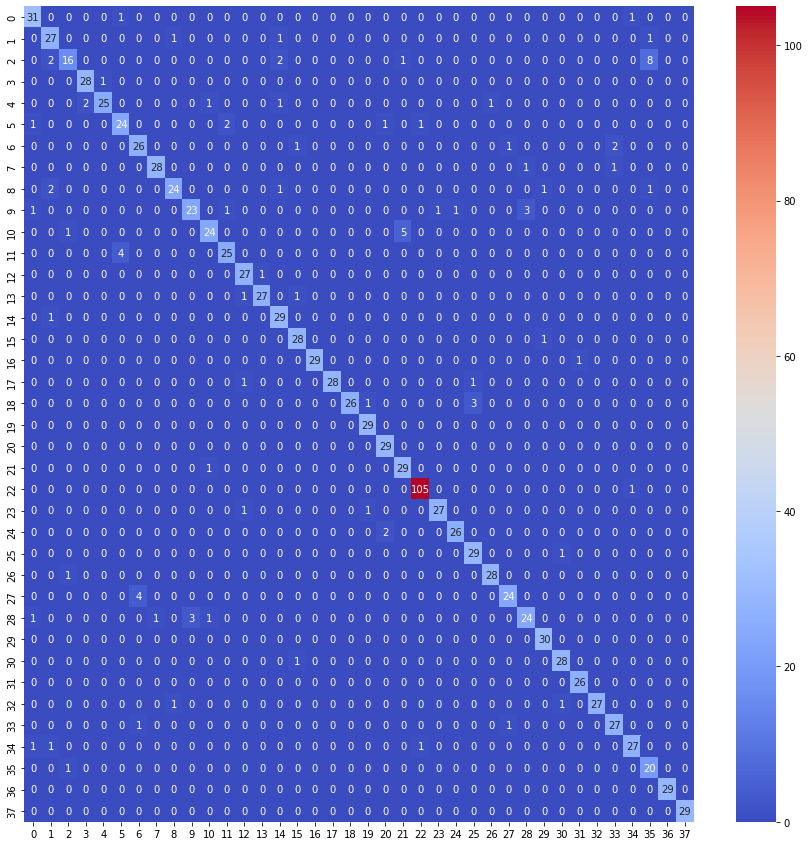

In [254]:
targets = [f'({key}) {value}' for key, value in breed_dict.items()]

print(classification_report(all_labels, all_preds, target_names=targets))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


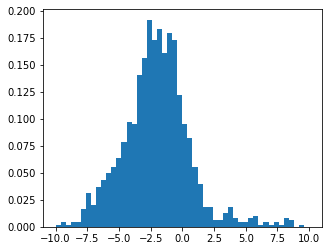

In [255]:
inputs, _ = next(iter(test_loader))
inputs = inputs.to(device)

with torch.no_grad():  
  outputs = model(inputs)

outputs = outputs.view(-1, 1)
outputs = outputs.detach().cpu().numpy()


plt.figure(figsize=(5, 4))
plt.hist(outputs, 50, density=True, range=(-10, 10))
plt.show()